# Imprting raw data

In [2]:
import pandas as pd 
import numpy as np

In [3]:
# csv file: https://www.baobeihuijia.com/Index.aspx 

df = pd.read_csv('宝贝回家.csv')
df.head(5)

,类别,姓名,性别,出生日期,失踪地点,失踪时间
0,家寻宝贝,艾金国（照..,男,1994-04-04,贵州省贵阳市南明区环南巷,1998-05-12
1,家寻宝贝,何建生,男,1997-04-17,四川省渠县渠江镇和平街县委..,2001-01-09
2,家寻宝贝,曾佳宇1,男,2001-03-15,湖南省常德市西洞庭农场,2003-01-08
3,家寻宝贝,张广翊,男,1999-09-13,湖北省荆洲市沙市区蛇入山(..,2003-04-20
4,家寻宝贝,王淑琛,女,2005-02-01,广东省东莞市企石镇铁炉坑村,2007-01-28


In [4]:
# csv file: https://www.baobeihuijia.com/Index.aspx 

sc = pd.read_csv('successful case.csv')
sc.head(5)

,编号,原因,姓名,年龄,原籍,拐入地,离家时间,回家时间
0,3533,被拐,刘民,6岁,四川省达州市,福建省泉州市,26年,2020年11月
1,3532,被拐,许燕云,4岁,北京,北京,32年,2020年11月
2,3531,被拐,杨成刚,3岁,山东省临沂市苍山县,山东省 临沂市苍山县,26年,2020年11月
3,3528,被拐,杨小龙,15岁,缅甸邦康,山西阳高县,13年,2020年11月
4,3527,被拐,黄东能,1岁,广东省惠州市,广东省汕头市,29年,2020年11月


# Data Cleaning for 宝贝回家

In [5]:
#Cleaning the data which is not belong to trafficking but delivering
df = df[~df['姓名'].str.contains('送')]

In [6]:
#Cleaning the data which is not belong to trafficking but depositing
df = df[~df['姓名'].str.contains('寄')]

In [7]:
#Cleaning the data which is not belong to trafficking but throwing
df = df[~df['姓名'].str.contains('弃')]

In [8]:
#Cleaning the data which is not belong to trafficking but delivering
df = df[~df['失踪地点'].str.contains('送')]

In [9]:
#Cleaning the data which is not belong to trafficking but depositing
df = df[~df['失踪地点'].str.contains('寄')]

In [10]:
#Cleaning the data which is not belong to trafficking but throwing
df = df[~df['失踪地点'].str.contains('弃')]

In [11]:
#Delete the columns which are not useful
df = df.drop(columns = '类别')

In [12]:
#Check the end 5 of the dataset which originally containing delivering
df.tail(5)

,姓名,性别,出生日期,失踪地点,失踪时间
51163,女婴,女,1988-06-17,"北京市,市辖县,大兴区采育镇..",1988-06-17
51167,林天天,男,2007-09-12,"广西壮族自治区,贵港市,港北..",2008-11-12
51168,李小毛,男,1959-11-12,"安徽省,宣城市,安徽省宣城北..",1959-12-31
51171,路理想,男,2010-01-01,"河南省,平顶山市,鲁山县张店..",2020-11-11
51173,龙水兰,女,1975-12-01,"湖南省,湘西土家族苗族自治..",1989-12-18


In [13]:
df.isnull().sum() # missing values in the entire dataset 

姓名      0
性别      0
出生日期    0
失踪地点    0
失踪时间    0
dtype: int64

In [14]:
#Clean the data about the date of birth
# regular expression here 
regex = r'^(\d{4})'

In [15]:
# about string extraction: https://www.baobeihuijia.com/Index.aspx 
extr = df['出生日期'].str.extract(r'^(\d{4})', expand=False) 
extr.head(10)

0    1994
1    1997
2    2001
3    1999
4    2005
5    1995
6    1999
7    1989
8    1996
9    1995
Name: 出生日期, dtype: object

In [16]:
# Store the new data
df['出生日期'] = pd.to_numeric(extr)
df['出生日期'].dtype

dtype('float64')

In [17]:
# Change the type of the data to integer
df['出生日期'] = df['出生日期'].astype('Int64')

In [18]:
# Check the new data
df['出生日期']

0        1994
1        1997
2        2001
3        1999
4        2005
         ... 
51163    1988
51167    2007
51168    1959
51171    2010
51173    1975
Name: 出生日期, Length: 31893, dtype: Int64

In [19]:
#Cleaning the data of missing place
# Have a look at the original style of the place of missing
df['失踪地点'].head(10)

0       贵州省贵阳市南明区环南巷
1    四川省渠县渠江镇和平街县委..
2        湖南省常德市西洞庭农场
3    湖北省荆洲市沙市区蛇入山(..
4      广东省东莞市企石镇铁炉坑村
5             贵州省贵阳市
6    四川省凉山州普格县社保局门..
7       江西省九江市发电厂宿舍区
8    四川成都市郫县犀浦恒山大道..
9       广东省英德市含光镇外婆家
Name: 失踪地点, dtype: object

In [20]:
# Retain the first two characters of the missing place
df['失踪地点'] = df['失踪地点'].apply(lambda x:x[:2]).tolist()

In [21]:
# Have a look at the new place of missing
df['失踪地点'].head(10)

0    贵州
1    四川
2    湖南
3    湖北
4    广东
5    贵州
6    四川
7    江西
8    四川
9    广东
Name: 失踪地点, dtype: object

In [22]:
# Cleaning the data of missing time
# about string extraction: https://www.baobeihuijia.com/Index.aspx 
extr = df['失踪时间'].str.extract(r'^(\d{4})', expand=False) 
extr.head(10)

0    1998
1    2001
2    2003
3    2003
4    2007
5    1999
6    2006
7    2000
8    2006
9    1999
Name: 失踪时间, dtype: object

In [23]:
# Store the new data
df['失踪时间'] = pd.to_numeric(extr)
df['失踪时间'].dtype

dtype('float64')

In [24]:
# Change the type of the data to integer
df['失踪时间'] = df['失踪时间'].astype('Int64')

In [25]:
# Check the new data
df['失踪时间']

0        1998
1        2001
2        2003
3        2003
4        2007
         ... 
51163    1988
51167    2008
51168    1959
51171    2020
51173    1989
Name: 失踪时间, Length: 31893, dtype: Int64

In [26]:
# We can add a list for the age of child 
a = np.array(df['失踪时间'])
b = np.array(df['出生日期'])
df['失踪年龄'] = a - b
print ("The column 失踪年龄 is a ",type (df['失踪年龄']))
df

The column 失踪年龄 is a  <class 'pandas.core.series.Series'>


,姓名,性别,出生日期,失踪地点,失踪时间,失踪年龄
0,艾金国（照..,男,1994,贵州,1998,4
1,何建生,男,1997,四川,2001,4
2,曾佳宇1,男,2001,湖南,2003,2
3,张广翊,男,1999,湖北,2003,4
4,王淑琛,女,2005,广东,2007,2
...,...,...,...,...,...,...
51163,女婴,女,1988,北京,1988,0
51167,林天天,男,2007,广西,2008,1
51168,李小毛,男,1959,安徽,1959,0
51171,路理想,男,2010,河南,2020,10


In [28]:
#Clean the data not for children
df = df[df['失踪年龄']<=18]

In [29]:
#Clean the data of missing year earlier than 1949
df = df[df['失踪时间']>=1949]

In [32]:
#Check the new dataset
df

,姓名,性别,出生日期,失踪地点,失踪时间,失踪年龄
0,艾金国（照..,男,1994,贵州,1998,4
1,何建生,男,1997,四川,2001,4
2,曾佳宇1,男,2001,湖南,2003,2
3,张广翊,男,1999,湖北,2003,4
4,王淑琛,女,2005,广东,2007,2
...,...,...,...,...,...,...
51163,女婴,女,1988,北京,1988,0
51167,林天天,男,2007,广西,2008,1
51168,李小毛,男,1959,安徽,1959,0
51171,路理想,男,2010,河南,2020,10


In [33]:
#Save the data
df.to_csv('宝贝回家.csv',encoding='utf-8')

# Data cleaning for successful case

In [34]:
#Check the end 5 of the dataset of the successful case
sc.tail(5)

,编号,原因,姓名,年龄,原籍,拐入地,离家时间,回家时间
1863,9,被拐,肖尚文,24岁,四川,福建,20年,2007年12月6日
1864,8,被拐,谢仙宾,25岁,峡西,河南,20年,2007年12月1日
1865,7,被拐,张仕林,4岁,荆州市,辽宁抚顺,2个月,2007年11月1日
1866,3,被拐,李圆开,25岁,贵州省织金,河南,20年,2007年8月18日
1867,1,被拐,张东,8岁,甘肃,内蒙,15天,2007年6月24日


In [35]:
#Delete the columns which are not useful
sc = sc.drop(columns = ['编号', '原因', '年龄', '离家时间'])

In [36]:
#Cleaning the data of original place
# Have a look at the original style of the original place
sc['原籍'].tail(10)

1858       四川
1859       四川
1860       广西
1861       深圳
1862    贵州省铜仁
1863       四川
1864       峡西
1865      荆州市
1866    贵州省织金
1867       甘肃
Name: 原籍, dtype: object

In [37]:
for i in range(len(sc['原籍'])):
    print(sc['原籍'][i])
    if not isinstance(sc['原籍'][i], float):
        print('2' + sc['原籍'][i][:2])
        sc['原籍'][i] = sc['原籍'][i][:2]
sc['原籍'].tail(10)

四川省达州市
2四川
北京
2北京
山东省临沂市苍山县
2山东
缅甸邦康
2缅甸
广东省惠州市
2广东
贵州省贵阳市
2贵州
湖南省衡东县
2湖南
贵州省六盘水
2贵州
贵州省水城县
2贵州
陕西省汉中市勉县
2陕西
新疆伊犁霍城县
2新疆
安徽省淮南市
2安徽
湖南株洲市茶陵县
2湖南
江苏省无锡市
2江苏
缅甸
2缅甸
四川省成都市
2四川
广西南宁市
2广西
河南省南阳市邓州市
2河南
贵州安顺
2贵州
贵州省贵阳市
2贵州
陕西铜川市瑶曲镇
2陕西
内蒙古呼伦贝尔阿荣旗
2内蒙
四川省达州市大竹县
2四川
陕西省西安市
2陕西
云南省昭通市大关县
2云南
贵州省贵阳市
2贵州
江苏省徐州市
2江苏
广东揭阳
2广东
贵州省毕节市织金县
2贵州
四川省攀枝花市
2四川
重庆忠县
2重庆
贵州省贵阳市
2贵州
陕西省咸阳市
2陕西
云南省昭通市巧家县
2云南
重庆
2重庆
贵州省铜仁市
2贵州
贵州省黔西南布依族苗族自治州兴仁县
2贵州
贵州省毕节市黔西县
2贵州
云南省昆明市
2云南
安徽省阜阳市
2安徽
贵州省贵阳市
2贵州
四川省广汉市
2四川
四川省达州市开江县
2四川
湖南省郴州市永兴县
2湖南
四川省广元市
2四川
吉林省安图县
2吉林
广西玉林
2广西
四川省遂宁市
2四川
贵州省六盘水盘县
2贵州
贵州省贵阳市
2贵州
广西北海市合浦县
2广西
陕西省汉中市
2陕西
贵州省毕节市
2贵州
湖北省武汉市
2湖北
河南省信阳市
2河南
广东省深圳市
2广东
福建省漳州市
2福建
福建省泉州市晋江市
2福建
山西省大同市
2山西
四川省内江市
2四川
江西萍乡
2江西
贵州省瓮安县
2贵州
辽宁省抚顺市
2辽宁
陕西省安康市
2陕西
贵州省黔西南布依族苗族自治州兴仁市
2贵州
重庆市潼南县
2重庆
天津市
2天津
内蒙古自治区包头市
2内蒙
浙江省温岭市
2浙江
四川省广安市
2四川
四川省成都市
2四川
云南省瑞丽市
2云南
广东省茂名市信宜市
2广东
安徽省宿州市
2安徽
福建省南平市武夷山市
2福建
浙江省湖州市
2浙江
贵州省贵阳市
2贵州
缅甸
2缅甸
陕西省安康市
2陕西
陕西省汉中市洋县  
2陕西
贵州省贵阳市
2贵州
云南省昆明市
2云南
陕西省安康市
2陕西
贵州省遵义市仁怀市
2贵州
广西柳州市
2广西
贵州省毕节市威宁县
2贵州

贵阳
2贵阳
广州
2广州
四川
2四川
山西
2山西
四川
2四川
重庆市
2重庆
广东省
2广东
四川
2四川
陕西
2陕西
云南
2云南
重庆
2重庆
安徽
2安徽
湖南
2湖南
四川
2四川
重庆
2重庆
广东省
2广东
四川省
2四川
陕西省
2陕西
山西省
2山西
云南省
2云南
湖北省
2湖北
贵州省遵义
2贵州
四川省
2四川
四川省,自贡市
2四川
北京市西城区
2北京
湖北省武汉市
2湖北
四川省
2四川
云南省,广南县 
2云南
四川省,巴中市
2四川
温州塘下镇
2温州
辽宁省沈阳市 
2辽宁
陕西省
2陕西
福建省莆田市
2福建
四川省,绵阳市
2四川
云南省昆明市
2云南
四川省重庆市
2四川
贵州省,六盘水市 
2贵州
福建
2福建
云南
2云南
贵州省
2贵州
河北省邢台市
2河北
四川省资阳市
2四川
四川省资阳
2四川
陕西省宝鸡市
2陕西
四川省眉山市
2四川
重庆
2重庆
四川省 
2四川
福建省厦门市
2福建
四川省,宜宾市
2四川
云南省
2云南
陕西省,商洛市,
2陕西
贵州贵阳
2贵州
广东
2广东
天津市,市辖区
2天津
云南省
2云南
越南义安省
2越南
云南省,昆明市,云南省昆明市
2云南
重庆
2重庆
四川省 凉山彝族自治州
2四川
广西
2广西
贵州省黔南州荔波县玉屏镇时来村鱼塘组 
2贵州
广东省,深圳市,步吉公园旁的理发店
2广东
贵州遵义
2贵州
湖北省 十堰
2湖北
四川省，三台县
2四川
云南省,昭通市大关县天星镇
2云南
贵州省遵义市
2贵州
河南省,郑州市,
2河南
黑龙江省,牡丹江市
2黑龙
云南省昆明市马关县
2云南
河南省,安阳市
2河南
广东省,东莞市,麻涌镇派出所
2广东
河南省沁阳市山王庄镇
2河南
江西省吉安市安福县横龙镇利田村
2江西
河北省,沧州市
2河北
福建省,莆田市
2福建
湖北省石首市
2湖北
四川省
2四川
湖北省武汉市
2湖北
福建省龙岩市
2福建
湖北省武汉市
2湖北
贵州省遵义市
2贵州
贵州省安顺市
2贵州
福建省晋江市
2福建
贵州省贵阳市
2贵州
贵州省遵义市
2贵州
河南省南阳市
2河南
福建省石狮市
2福建
贵州省
2贵州
河南省焦作市
2河南
江西省赣州市
2江西
四川省
2四川
重庆市
2重庆
越南
2越南
湖南省
2湖南
湖北省
2湖北
广东省


1858    四川
1859    四川
1860    广西
1861    深圳
1862    贵州
1863    四川
1864    峡西
1865    荆州
1866    贵州
1867    甘肃
Name: 原籍, dtype: object

In [38]:
#Cleaning the data of trafficking place
for i in range(len(sc['拐入地'])):
    print(sc['拐入地'][i])
    if not isinstance(sc['拐入地'][i], float):
        print('2' + sc['拐入地'][i][:2])
        sc['拐入地'][i] = sc['拐入地'][i][:2]
sc['拐入地'].tail(10)

福建省泉州市
2福建
北京
2北京
山东省 临沂市苍山县
2山东
山西阳高县
2山西
广东省汕头市
2广东
福建省莆田市
2福建
湖南省永州市
2湖南
河南省新乡市
2河南
山东省济宁市
2山东
河南省商丘市民权县
2河南
新疆伊犁
2新疆
江苏连云港灌南县
2江苏
湖南省株洲市
2湖南
nan
河南省
2河南
陕西省宝鸡市
2陕西
广东省汕头市
2广东
河南省南阳市邓州市
2河南
江苏徐州
2江苏
江苏徐州
2江苏
陕西省安康市
2陕西
湖北省恩施市
2湖北
广东省普宁市
2广东
河南省新乡市
2河南
福建省泉州市
2福建
福建厦门
2福建
安徽省合肥市肥东县
2安徽
江西省广昌
2江西
福建
2福建
河南省濮阳市
2河南
广东广州市
2广东
安徽省天长市
2安徽
安徽省宿州市
2安徽
福建省莆田市
2福建
广东中山
2广东
广东省广州市
2广东
河北邯郸
2河北
福建泉州
2福建
广东省揭阳
2广东
安徽省阜阳市
2安徽
福建省莆田市
2福建
河北省邯郸市
2河北
福建省莆田市
2福建
河北省衡水市
2河北
河北沧州
2河北
山东日照
2山东
安徽庐江县
2安徽
河北省石家庄
2河北
广东汕头
2广东
福建泉州
2福建
福建安溪
2福建
河北省邯郸市永年县
2河北
广东省深圳市
2广东
河南省郑州市
2河南
河南省安阳市
2河南
广东省深圳市
2广东
福建莆田
2福建
浙江省绍兴市
2浙江
河南
2河南
河北省沧州市
2河北
广东江门市
2广东
四川省达州市
2四川
山东省菏泽市
2山东
河南省南阳市
2河南
浙江省金华市
2浙江
广东省广州市
2广东
湖北省十堰市
2湖北
河北省邯郸市
2河北
福建省晋江市
2福建
四川省广安市邻水县
2四川
安徽省蚌埠市
2安徽
福建省莆田市
2福建
重庆
2重庆
江苏徐州
2江苏
福建省南平市武夷山市
2福建
浙江省湖州市
2浙江
福建省尤溪市
2福建
泰国
2泰国
河北省邯郸市
2河北
河南省南阳市
2河南
河北省保定市
2河北
山东济宁
2山东
山东菏泽市成武县
2山东
福建三明
2福建
广西玉林市
2广西
福建省泉州市
2福建
河北邢台
2河北
江苏省苏州市
2江苏
江西省南昌市
2江西
河南省安阳市
2河南
广东东莞
2广东
河南省许昌市
2河南
山东平度
2山东
广东省汕头市
2广东
江苏省徐州市
2江苏
河北省

河南省
2河南
福建省
2福建
江西省
2江西
河南省
2河南
福建省
2福建
福建省
2福建
福建省
2福建
福建省莆田
2福建
福建省
2福建
河北省
2河北
河北省
2河北
河北省
2河北
河南省
2河南
江苏省
2江苏
广东省
2广东
安徽省
2安徽
四川省
2四川
成都市
2成都
江苏省
2江苏
甘肃省
2甘肃
福建省
2福建
河南省
2河南
安徽省
2安徽
广东省
2广东
河南省
2河南
福建省
2福建
广东省
2广东
福建省
2福建
河北省
2河北
福建省
2福建
安徽省
2安徽
福建省
2福建
广东省
2广东
广东省
2广东
安徽省
2安徽
安徽省
2安徽
安徽省
2安徽
安徽省
2安徽
河北省
2河北
福建省
2福建
河南省
2河南
福建省
2福建
福建省
2福建
广东省
2广东
河南省
2河南
贵州省
2贵州
河北省
2河北
福建省
2福建
河南省
2河南
福建省
2福建
山西省
2山西
广东省
2广东
河北省
2河北
河南省
2河南
河南省
2河南
福建省
2福建
广东省
2广东
广东省
2广东
江苏省
2江苏
河南省
2河南
广东省
2广东
福建
2福建
福建
2福建
浙江
2浙江
福建省
2福建
福建省
2福建
福建省
2福建
山东省
2山东
山东省
2山东
江苏省
2江苏
广东省
2广东
福建省
2福建
河北省
2河北
重庆市
2重庆
山东
2山东
新疆石河子市
2新疆
广东省
2广东
河南省
2河南
河南省
2河南
福建省
2福建
福建省
2福建
河北省
2河北
河南省
2河南
广东省
2广东
江苏省
2江苏
福建
2福建
福建省
2福建
重庆
2重庆
山东
2山东
福建省
2福建
河南省
2河南
福建省
2福建
福建省
2福建
广东省
2广东
山东省
2山东
山东省
2山东
河北省
2河北
重庆市
2重庆
四川省
2四川
河南省
2河南
福建省
2福建
河北省
2河北
河北省
2河北
山东省
2山东
山东省
2山东
重庆市
2重庆
河南省
2河南
福建省
2福建
河北省
2河北
福建省
2福建
云南省
2云南
陕西省
2陕西
河北省
2河北
河北省
2河北
福建省
2福建
河北省
2河北
福建省
2福建
山东省
2山东
江苏省
2江苏
安徽省
2安徽
福建省
2福建
山东省
2山东
河北省
2河北
安徽省
2安徽
福建省
2福建
河北

1858    长沙
1859    钦州
1860    钦州
1861    深圳
1862    河南
1863    福建
1864    河南
1865    辽宁
1866    河南
1867    内蒙
Name: 拐入地, dtype: object

In [39]:
# regular expression here 
regex = r'^(\d{4})'

In [40]:
# Cleaning the data of backing time
# about string extraction: https://www.baobeihuijia.com/Index.aspx 
extr = sc['回家时间'].str.extract(r'^(\d{4})', expand=False) 
extr.head(10)

0    2020
1    2020
2    2020
3    2020
4    2020
5    2020
6    2020
7    2020
8    2020
9    2020
Name: 回家时间, dtype: object

In [41]:
# Store the new data
sc['回家时间'] = pd.to_numeric(extr)
sc['回家时间'].dtype

dtype('float64')

In [42]:
# Change the type of the data to integer
sc['回家时间'] = sc['回家时间'].astype('Int64')

In [43]:
#Check the end 5 of the dataset
sc.tail(20)

,姓名,原籍,拐入地,回家时间
1848,席雪娇,新疆,河南,2009
1849,岳随民（王忍）,湖北,山东,2009
1850,韦阳,深圳,深圳,2008
1851,秋水,湖北,山东,2008
1852,吕亚丽,浙江,河南,2008
1853,刘洋,未知,未知,2008
1854,志愿者解救的孩子,广西,广西,2008
1855,志愿者解救的孩子,广西,广西,<NA>
1856,刘为夹,河南,重庆,2013
1857,毛洪,贵阳,福建,2008


In [44]:
sc.to_csv('Successful case.csv',encoding='utf-8')

# Analysis

In [45]:
df.describe() 

,出生日期,失踪时间
count,31272.000000,31272.000000
mean,1988.374456,1993.791954
std,11.837395,12.661379
min,1935.000000,1949.000000
25%,1984.000000,1988.000000
50%,1990.000000,1994.000000
75%,1995.000000,2001.000000
max,2020.000000,2020.000000


In [46]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'The frequency of trafficking in different years')

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 36394 missing from cur

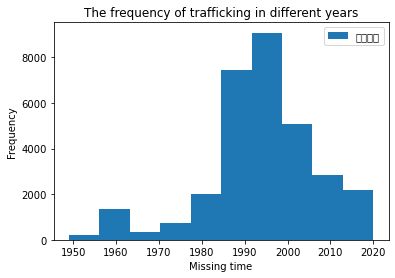

In [47]:
#The chart for missing time
df.plot.hist(y="失踪时间")
plt.ylabel('Frequency')
plt.xlabel("Missing time")
plt.title("The frequency of trafficking in different years")

In [48]:
#pie chart of gender
#统计男女比例
man=0
woman=0
others=0
for  sex in df['性别']:#从性别列读取数据
        if sex=='男':
            man+=1
        elif sex=='女':
            woman+=1
        else:
            others+=1

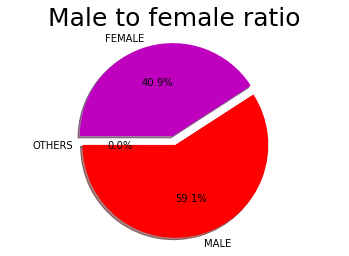

In [50]:
#绘制饼状图
 
labels=['MALE','FEMALE','OTHERS']
#绘图显示的标签
values=[man,woman,others]
colors=['r','m','g']
explode=[0,0.1,0]
#旋转角度
plt.title("Male to female ratio",fontsize=25)
#标题
plt.pie(values,labels=labels,explode=explode,colors=colors,
        startangle = 180,
        shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22235 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28246 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21335 missing from c

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 36149 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24030 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22235 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 28246 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21335 missing from current fon

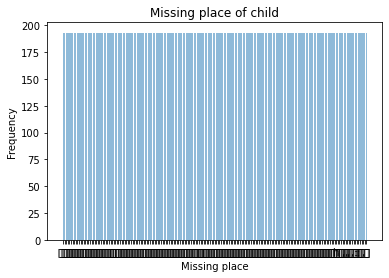

In [51]:
#The chart of the missing place


x = df['失踪地点'].unique().tolist()

y = df['失踪地点'].nunique()

plt.bar(x, y, align='center', alpha=0.5)

plt.ylabel('Frequency')
plt.xlabel("Missing place")
plt.title('Missing place of child')

plt.show()

In [52]:
#filter the major missing places, which appear more than 20 times
dd = df.groupby('失踪地点').filter(lambda x:len(x)>20)

#Major missing place
print(dd['失踪地点'].value_counts())

贵州    3702
四川    3392
广东    2858
河南    2278
湖北    1507
云南    1393
江苏    1302
湖南    1297
重庆    1237
安徽    1231
陕西    1190
广西    1099
福建    1065
江西     957
河北     906
山东     900
浙江     733
山西     565
上海     550
黑龙     464
甘肃     421
新疆     334
北京     324
吉林     286
辽宁     276
内蒙     209
宁夏     166
天津     141
青海     113
海南      83
西藏      22
Name: 失踪地点, dtype: int64


In [53]:
#filter the major missing ages, which appear more than 20 times
ma = df.groupby('失踪年龄').filter(lambda x:len(x)>10)

#Major missing ages
print(ma['失踪年龄'].value_counts())

0     5476
3     3435
4     3224
2     2786
5     2549
1     2192
6     1936
15    1675
14    1352
7     1253
8      945
13     917
16     906
9      755
10     680
12     611
11     553
17      11
Name: 失踪年龄, dtype: int64


Text(0.5, 1.0, 'The numbers of successful cases over different years')

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0, flags=flags)


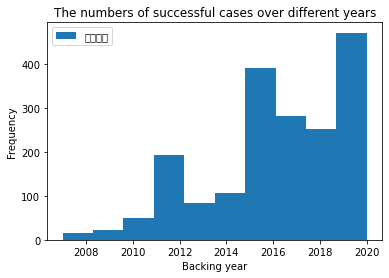

In [54]:
#The chart for numbers of successful cases over different years
sc.plot.hist(y="回家时间")
plt.ylabel('Frequency')
plt.xlabel("Backing year")
plt.title("The numbers of successful cases over different years")